## <span style="color:Aquamarine">**Exercise**</span>

1. Load this csv in pandas dataframe and first plot histograms for height and weight parameters

2. Using IQR detect weight outliers and print them

3. Using IQR, detect height outliers and print them

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("F:\Machine Learning all Algorithms\Feature Engineering\Outlier Detection IQR\weight-height.csv")
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [3]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


### **Plot histograms for height and weight data**

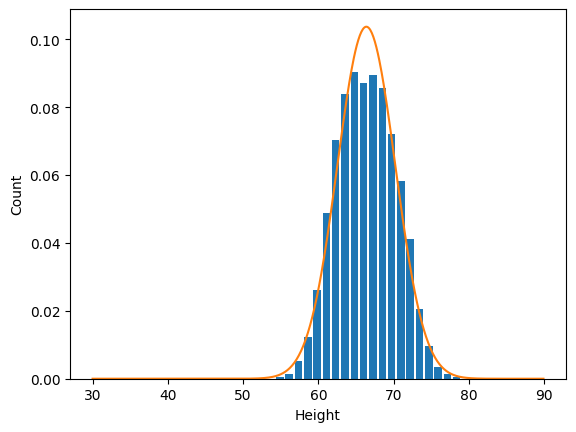

In [4]:
# Height data with the bell curve
from scipy.stats import norm

plt.hist(df['Height'], bins=20, rwidth=0.8, density=True)
plt.xlabel('Height')
plt.ylabel('Count')

rng=np.arange(30, 90, 0.1)
plt.plot(rng, norm.pdf(rng, df['Height'].mean(), df['Height'].std()))



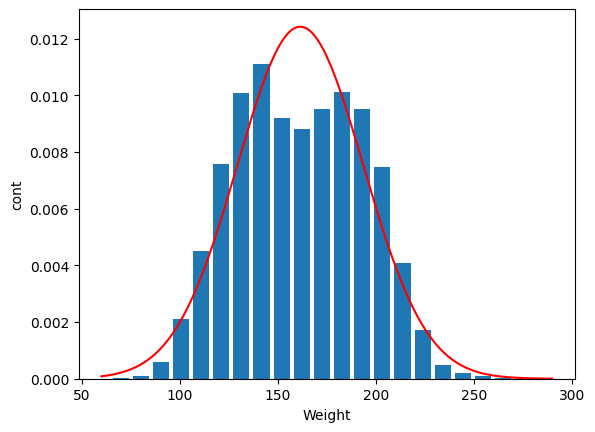

In [5]:
# Weight Data with bell curve

plt.hist(df['Weight'], bins=20, rwidth=0.8, density=True)
plt.xlabel('Weight')
plt.ylabel('cont')

rng1=np.arange(60, 290, 0.1)
plt.plot(rng1, norm.pdf(rng1, df['Weight'].mean(), df['Weight'].std()), 'red')
plt.show()

### **Height Oultliers using IQR**

In [6]:
Q1 = df['Height'].quantile(0.25)
Q3 = df['Height'].quantile(0.75)
Q1, Q3

(63.505620481218955, 69.1742617268347)

In [7]:
IQR = Q3 - Q1
IQR

5.668641245615746

In [8]:
# Outliers in Height

lower_lim = Q1 - 1.5*IQR
upper_lim = Q3 + 1.5*IQR

lower_lim, upper_lim

(55.00265861279534, 77.67722359525831)

In [9]:
df[(df['Height'] < lower_lim) | (df['Height'] > upper_lim)]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
7294,Female,54.873728,78.606670
9285,Female,54.263133,64.700127


In [10]:
h_out=df[(df['Height'] > lower_lim) & (df['Height'] < upper_lim)]
h_out

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


### **Weight Oultliers using IQR**

In [11]:
Q1 = df['Weight'].quantile(0.25)
Q3 = df['Weight'].quantile(0.75)

IQR = Q3 - Q1
IQR

51.35147356318197

In [12]:
lower_lim = Q1 - 1.5*IQR
upper_lim = Q3 + 1.5*IQR

lower_lim, upper_lim

(58.79084096072856, 264.19673521345646)

In [13]:
# Outliers in Weight

df[(df['Weight'] < lower_lim) | (df['Weight'] > upper_lim)]

,Gender,Height,Weight
2014,Male,78.998742,269.989699


In [14]:
W_out = df[(df['Weight'] > lower_lim) & (df['Weight'] < upper_lim)]
W_out

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461
